<div style="display: flex; align-items: center; justify-content: space-between; border-bottom: 3px solid #D0D0D0; padding: 10px; font-family: Arial, sans-serif;">
  <!-- Logo -->
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/Uoc_masterbrand_vertical.png" alt="Logo" style="width: 150px; height: auto;">

  <!-- Detalles -->
  <div style="text-align: right; line-height: 1.6; margin-left: 20px; margin-right: 80px">
    <p style="margin: 0; font-size: 1.2em; font-weight: bold; color: #333;">Proyecto: <span style="color: #878787;">Práctica - Parte 2</span></p>
    <p style="margin: 0; font-size: 1em; font-weight: bold; color: #333;">Notebook: <span style="color: #878787;">Exploración inicial de datos de sueño</span></p>
    <p style="color: #878787;">Juan Luis González Rodríguez - Visualización de datos</span></p>
  </div>
</div>

Se analiza como afecta el nivel de estrés y ansiedad a la calidad del sueño de los usuarios.

# 0. Librerías

In [103]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

pd.set_option('future.no_silent_downcasting', True)

# 1. Carga de datos

In [104]:
inclinometer_path = os.path.join('..', '0_data', 'clean_MMASH', 'inclinometer_clean.pkl')
df_inclinometer = pd.read_pickle(inclinometer_path)

actigraph_path = os.path.join('..', '0_data', 'clean_MMASH', 'actigraph_clean.pkl')
df_actigraph = pd.read_pickle(actigraph_path)
df_actigraph.drop(columns=['Inclinometer Off', 'Inclinometer Standing', 'Inclinometer Sitting', 'Inclinometer Lying'], inplace=True)

In [105]:
df_actigraph

,datetime,User,Axis1,Axis2,Axis3,Steps,HR,Vector Magnitude,day,time
0,1900-01-01 10:10:22,user_1,35.273141,37.153257,53.689895,0,93.018034,83.235840,1,10:10:22
1,1900-01-01 10:10:23,user_1,35.261592,37.141202,53.668095,1,93.010818,83.206727,1,10:10:23
2,1900-01-01 10:10:24,user_1,35.249925,37.129003,53.646171,0,93.003532,83.177385,1,10:10:24
3,1900-01-01 10:10:25,user_1,35.238148,37.116665,53.624129,0,92.996178,83.147825,1,10:10:25
4,1900-01-01 10:10:26,user_1,35.226264,37.104193,53.601979,1,92.988757,83.118059,1,10:10:26
...,...,...,...,...,...,...,...,...,...,...
1462673,1900-01-02 09:24:23,user_9,0.000000,0.000000,0.000000,0,76.054557,0.000000,2,09:24:23
1462674,1900-01-02 09:24:30,user_9,0.000000,0.000000,0.000000,0,76.055057,0.000000,2,09:24:30
1462675,1900-01-02 09:24:31,user_9,0.000000,0.000000,0.000000,0,76.055057,0.000000,2,09:24:31
1462676,1900-01-02 09:24:32,user_9,0.000000,0.000000,0.000000,0,76.055057,0.000000,2,09:24:32


In [106]:
df_inclinometer

,datetime,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,User
0,1900-01-01 10:10:22,0,1,0,0,user_1
1,1900-01-01 10:10:23,0,1,0,0,user_1
2,1900-01-01 10:10:24,0,0,1,0,user_1
3,1900-01-01 10:10:25,0,0,1,0,user_1
4,1900-01-01 10:10:26,0,1,0,0,user_1
...,...,...,...,...,...,...
1905660,1900-01-02 09:24:29,1,0,0,0,user_9
1905661,1900-01-02 09:24:30,1,0,0,0,user_9
1905662,1900-01-02 09:24:31,1,0,0,0,user_9
1905663,1900-01-02 09:24:32,1,0,0,0,user_9


# 2. Exploración de las visualizaciones

In [107]:
# Se deshace el one-hot encoding de las columnas Inclinometer Off, Standing, Sitting y Lying
df_inclinometer_cat = df_inclinometer.copy()
df_inclinometer_cat['Inclinometer_status'] = df_inclinometer[['Inclinometer Off', 'Inclinometer Standing', 'Inclinometer Sitting', 'Inclinometer Lying']].idxmax(axis=1)

# Cambiamos los niveles de las categorías a español
df_inclinometer_cat['Inclinometer_status'] = df_inclinometer_cat['Inclinometer_status'].replace({
    'Inclinometer Off': 'Apagado',
    'Inclinometer Standing': 'De pie',
    'Inclinometer Sitting': 'Sentado',
    'Inclinometer Lying': 'Tumbado'
})

df_inclinometer_cat.drop(columns=['Inclinometer Off', 'Inclinometer Standing', 'Inclinometer Sitting', 'Inclinometer Lying'], inplace=True)
df_inclinometer_cat

,datetime,User,Inclinometer_status
0,1900-01-01 10:10:22,user_1,De pie
1,1900-01-01 10:10:23,user_1,De pie
2,1900-01-01 10:10:24,user_1,Sentado
3,1900-01-01 10:10:25,user_1,Sentado
4,1900-01-01 10:10:26,user_1,De pie
...,...,...,...
1905660,1900-01-02 09:24:29,user_9,Apagado
1905661,1900-01-02 09:24:30,user_9,Apagado
1905662,1900-01-02 09:24:31,user_9,Apagado
1905663,1900-01-02 09:24:32,user_9,Apagado


In [108]:
df_inclinometer = df_inclinometer_cat

In [109]:
def plot_user_inclinometer(df_user_inclinometer, df_user_actigraph, user):
    """
    Función que plotea el actigraph del usuario y el heatmap del inclinómetro.

    Parameters
    ----------
    df_user_inclinometer : pd.DataFrame
        DataFrame con los datos del inclinómetro.
    df_user_actigraph : pd.DataFrame
        DataFrame con los datos del actigraph.
    user : str
        Usuario para el cual se genera el gráfico.

    Returns
    -------
    None
    """
    # Configuración de estilo para seaborn
    sns.set_style("white")
    sns.set_context("notebook", font_scale=1.2)

    # Crear figura y subgráficos
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Título principal
    fig.suptitle(f'Inclinómetro y Frecuencia Cardíaca para el usuario {user}', fontsize=16)

    # Se obtiene la frecuencia cardíaca del usuario
    hr = df_user_actigraph['HR']

    # Se remapea la columna Inclinometer_status a valores numéricos
    status_mapping = {'Apagado': 0, 'De pie': 1, 'Sentado': 2, 'Tumbado': 3}
    df_user_inclinometer.loc[:, 'Inclinometer_status'] = df_user_inclinometer['Inclinometer_status'].map(status_mapping)

    # Crear un rango de tiempo completo para alinear ambos gráficos
    tiempo_min = min(df_user_inclinometer['datetime'].min(), df_user_actigraph['datetime'].min())
    tiempo_max = max(df_user_inclinometer['datetime'].max(), df_user_actigraph['datetime'].max())
    tiempo_completo = pd.date_range(start=tiempo_min, end=tiempo_max, freq='1min')  # Frecuencia de 1 minuto

    # Reindexar los datos del inclinómetro para cubrir el rango completo
    df_user_inclinometer = df_user_inclinometer.set_index('datetime').reindex(tiempo_completo).fillna({'Inclinometer_status': 0}).reset_index()
    df_user_inclinometer.rename(columns={'index': 'datetime'}, inplace=True)

    # Pivotar el dataframe para crear una matriz con tiempo como columnas
    df_heatmap = df_user_inclinometer.pivot(index='datetime', columns='User', values='Inclinometer_status')

    # Convertir a enteros los valores de la matriz
    df_heatmap = df_heatmap.fillna(0).astype(int)  # Rellenar valores faltantes con 0

    # Se definen los colores para cada categoría con un diccionario
    colors = {0: '#000078', 1: '#38FF90', 2: '#FF87FF', 3: '#FF7D87'}
    cmap = ListedColormap([colors[key] for key in sorted(colors.keys())])

    # Formatear el índice de tiempo para el heatmap
    df_heatmap = df_heatmap.T
    df_heatmap.columns = df_heatmap.columns.strftime('%d %H:%M')

    # Plotear el heatmap
    sns.heatmap(df_heatmap, cmap=cmap, cbar=False, ax=ax2)
    ax2.set_xlabel('Tiempo', labelpad=10)
    ax2.set_ylabel('Inclinómetro')

    # Ajustar los límites del eje X del heatmap
    ax2.set_xlim(0, len(tiempo_completo))

    # Establece saltos en las etiquetas del eje X para no mostrar tantas en el gráfico
    n = 5
    for i, label in enumerate(ax2.get_xticklabels()):
        if i % n != 0:
            label.set_visible(False)

    # Plotear la frecuencia cardíaca
    ax1.plot(df_user_actigraph['datetime'], hr, color='red', label='HR')
    ax1.set_ylabel('Frecuencia Cardíaca')

    # Sincronizar el rango del eje X
    ax1.set_xlim(tiempo_min, tiempo_max)

    # Añadir líneas de grid
    ax1.grid(axis='x')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título
    plt.show()

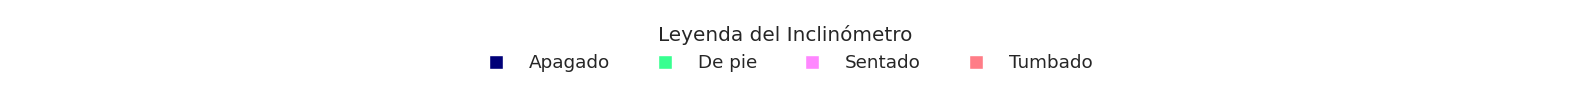

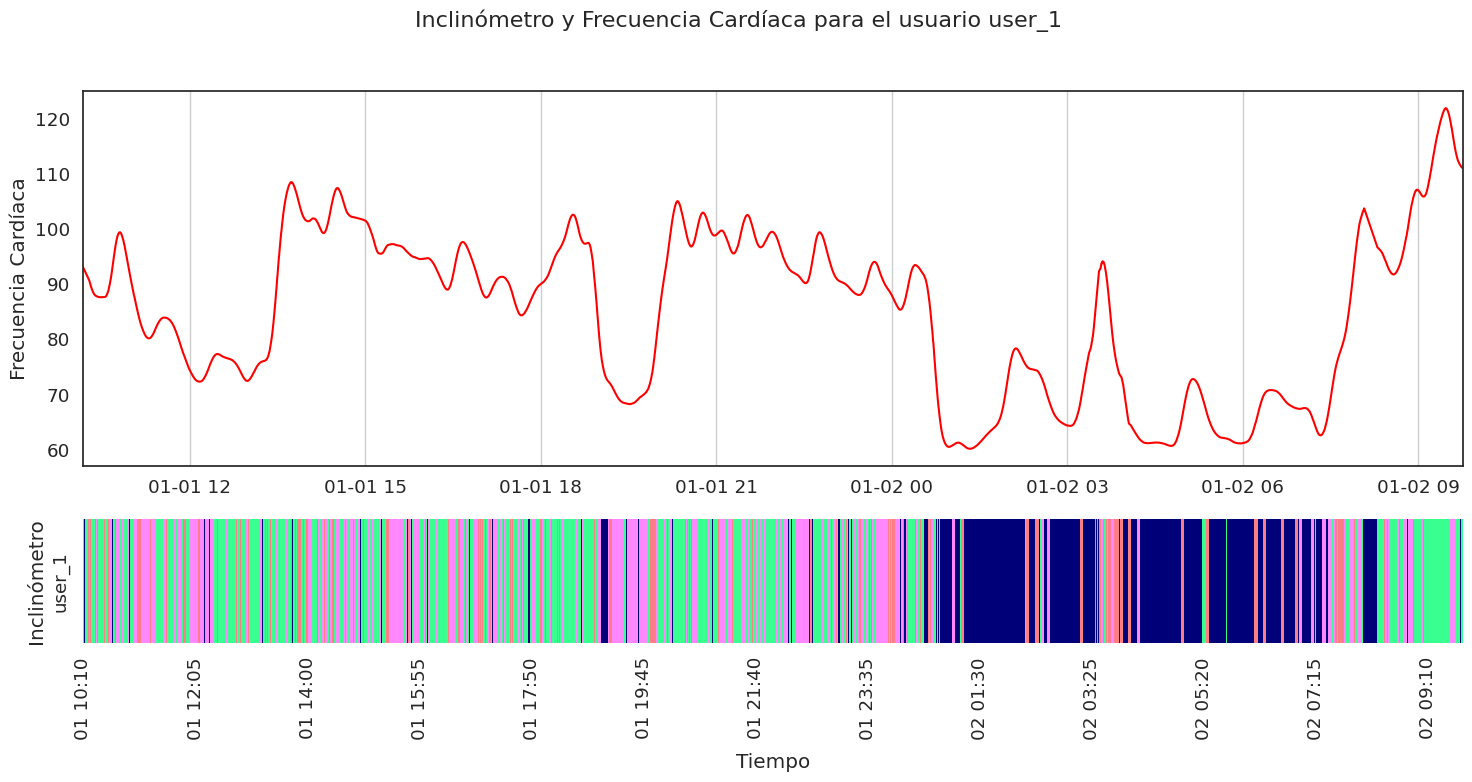

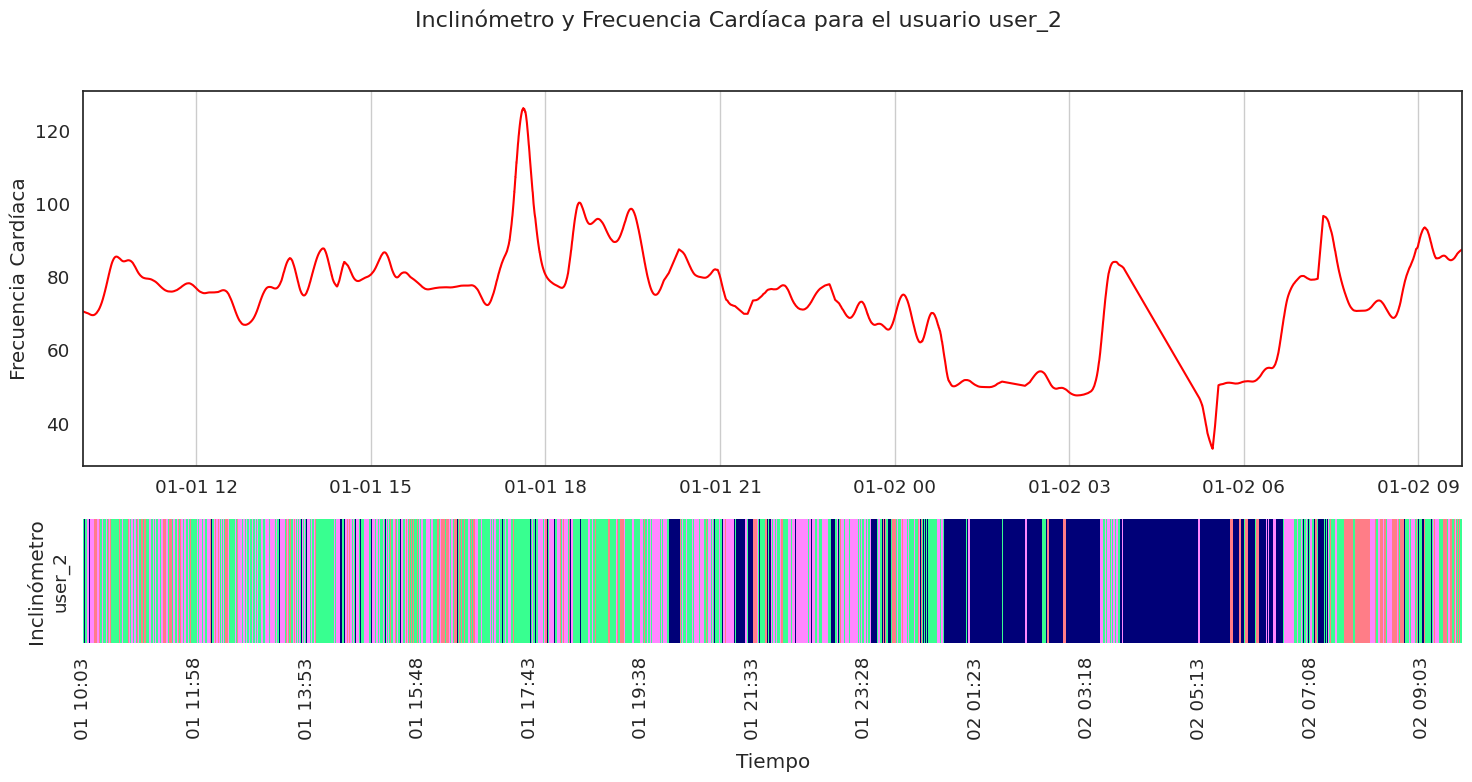

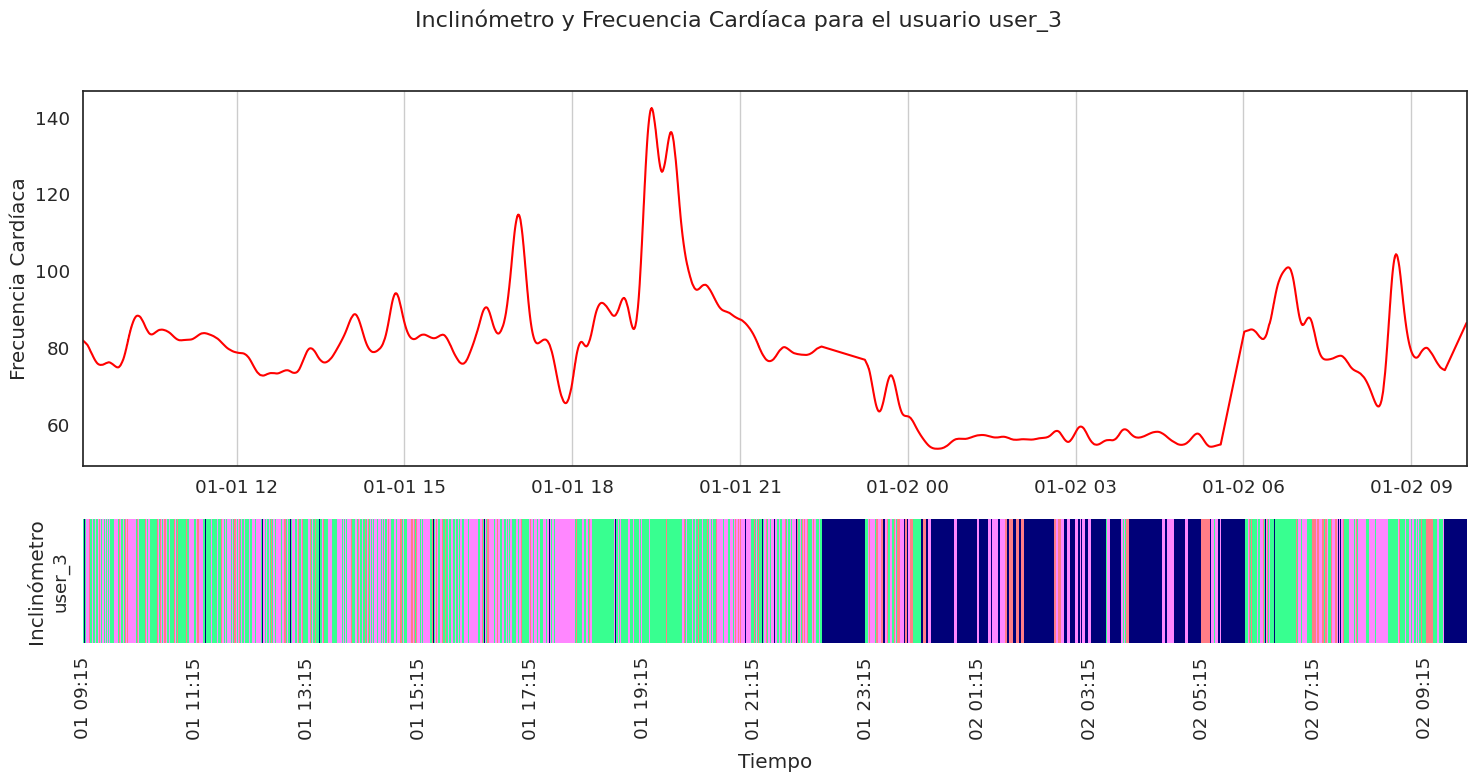

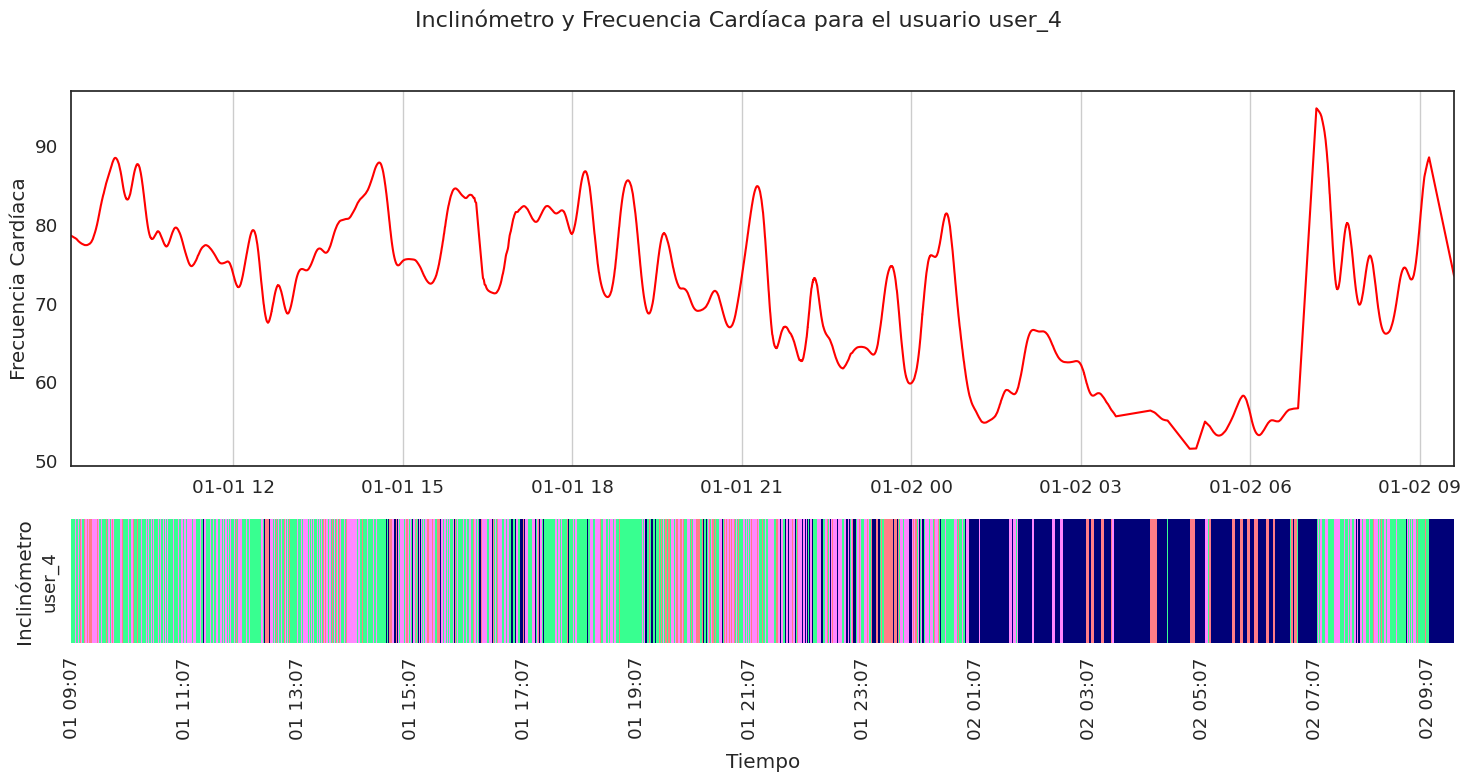

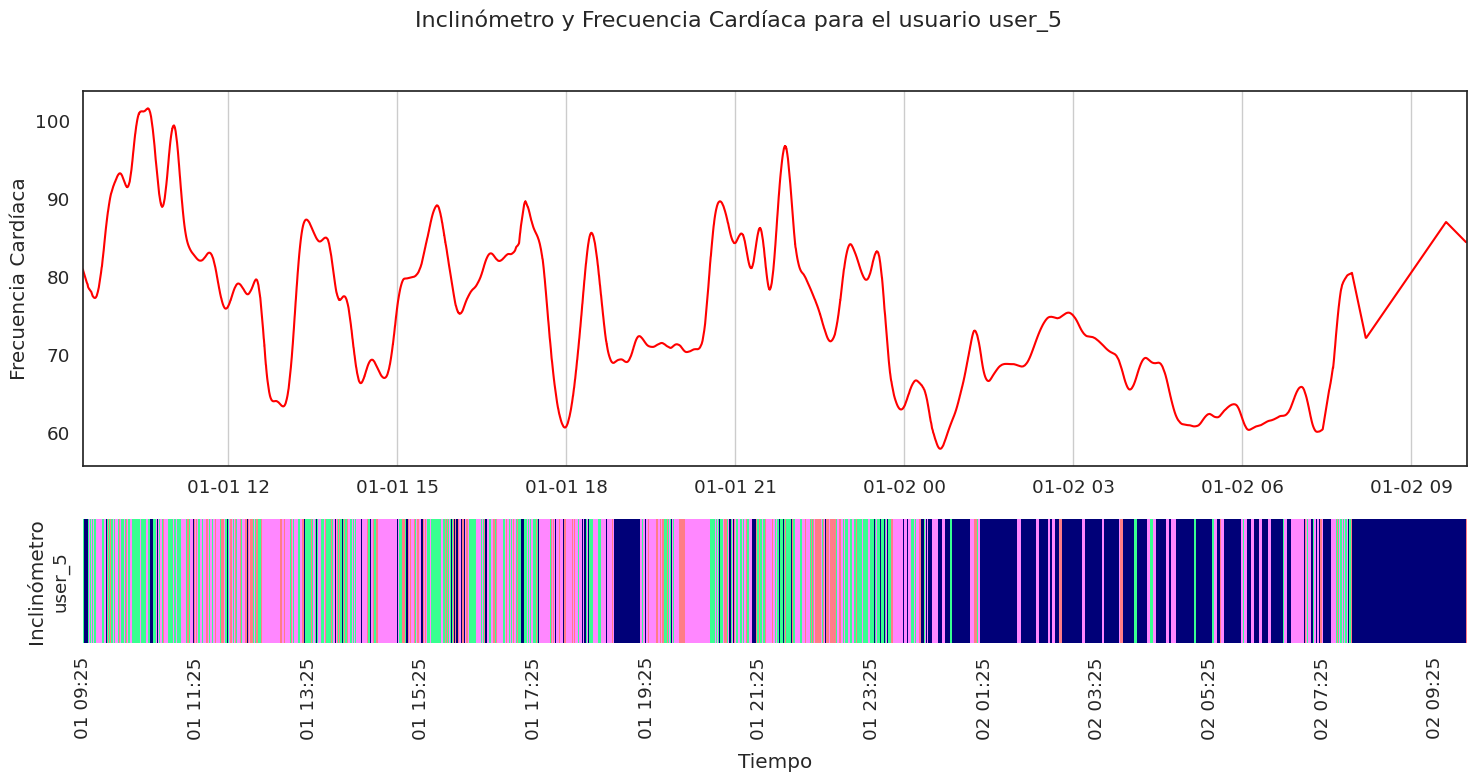

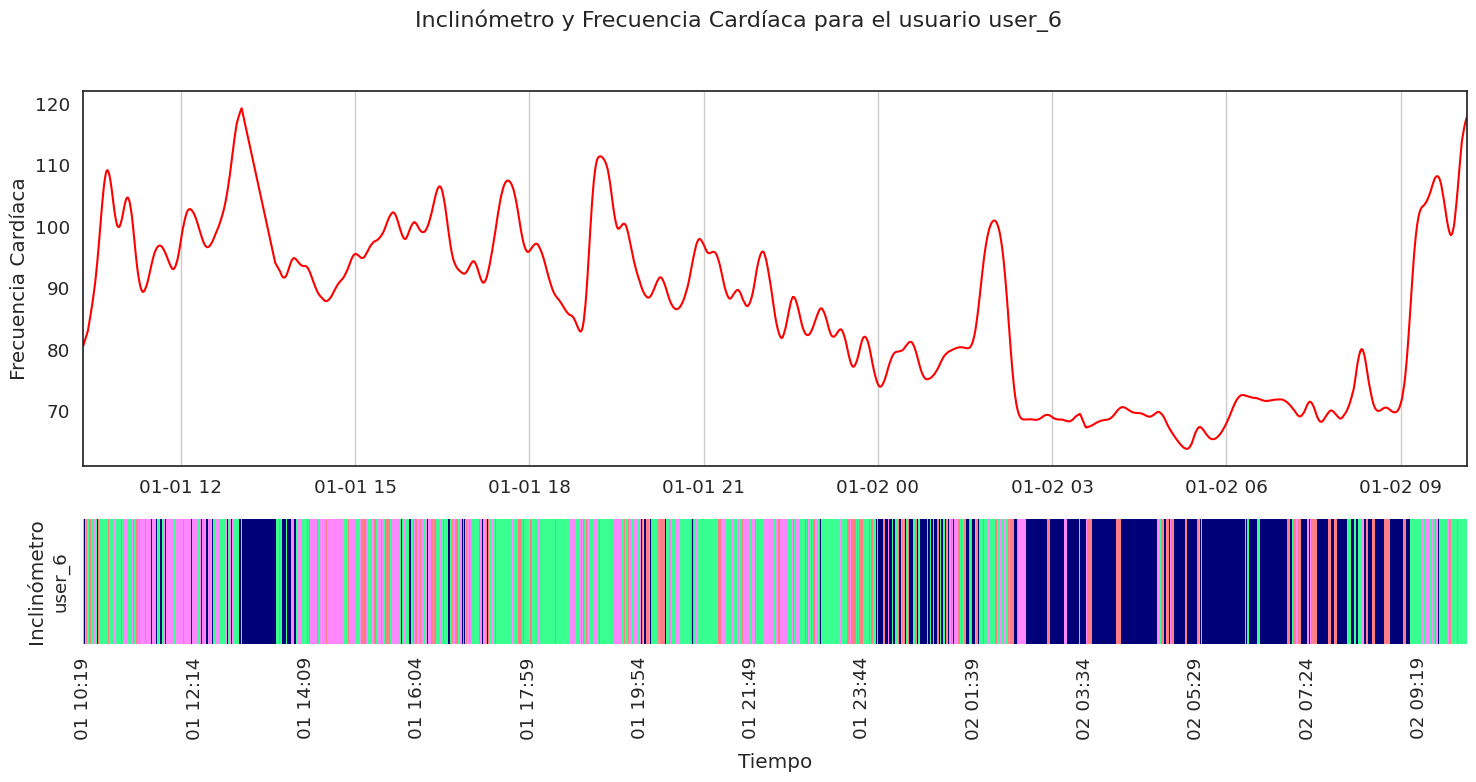

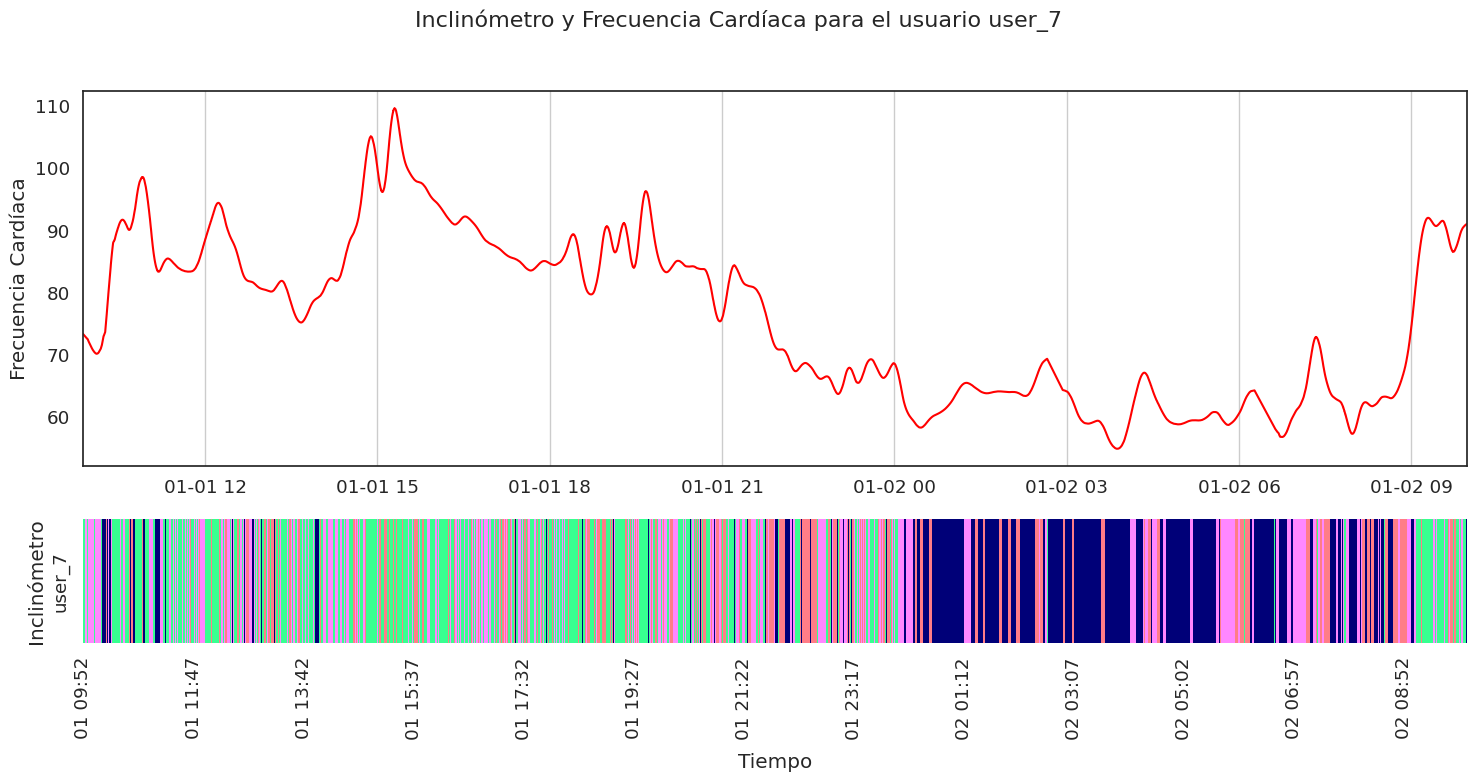

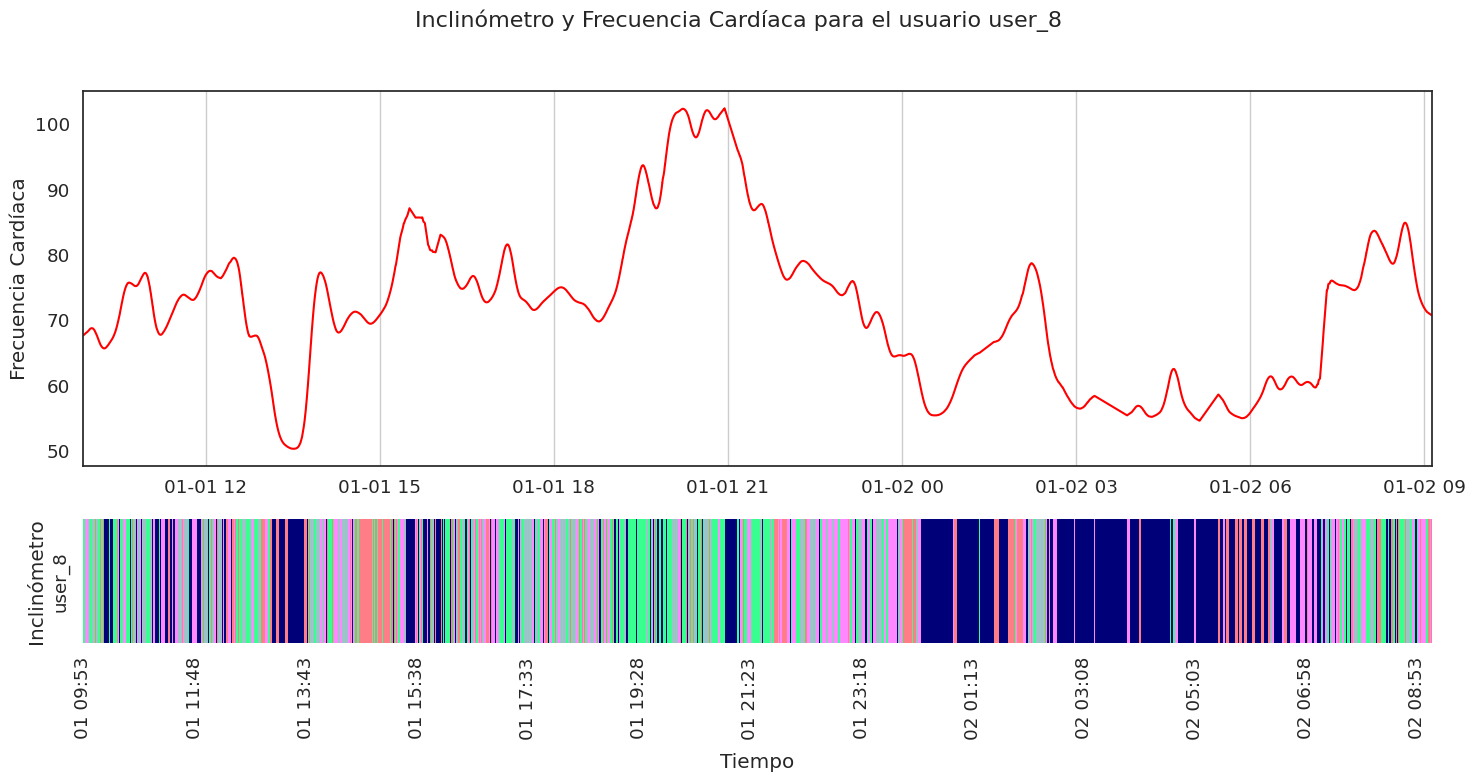

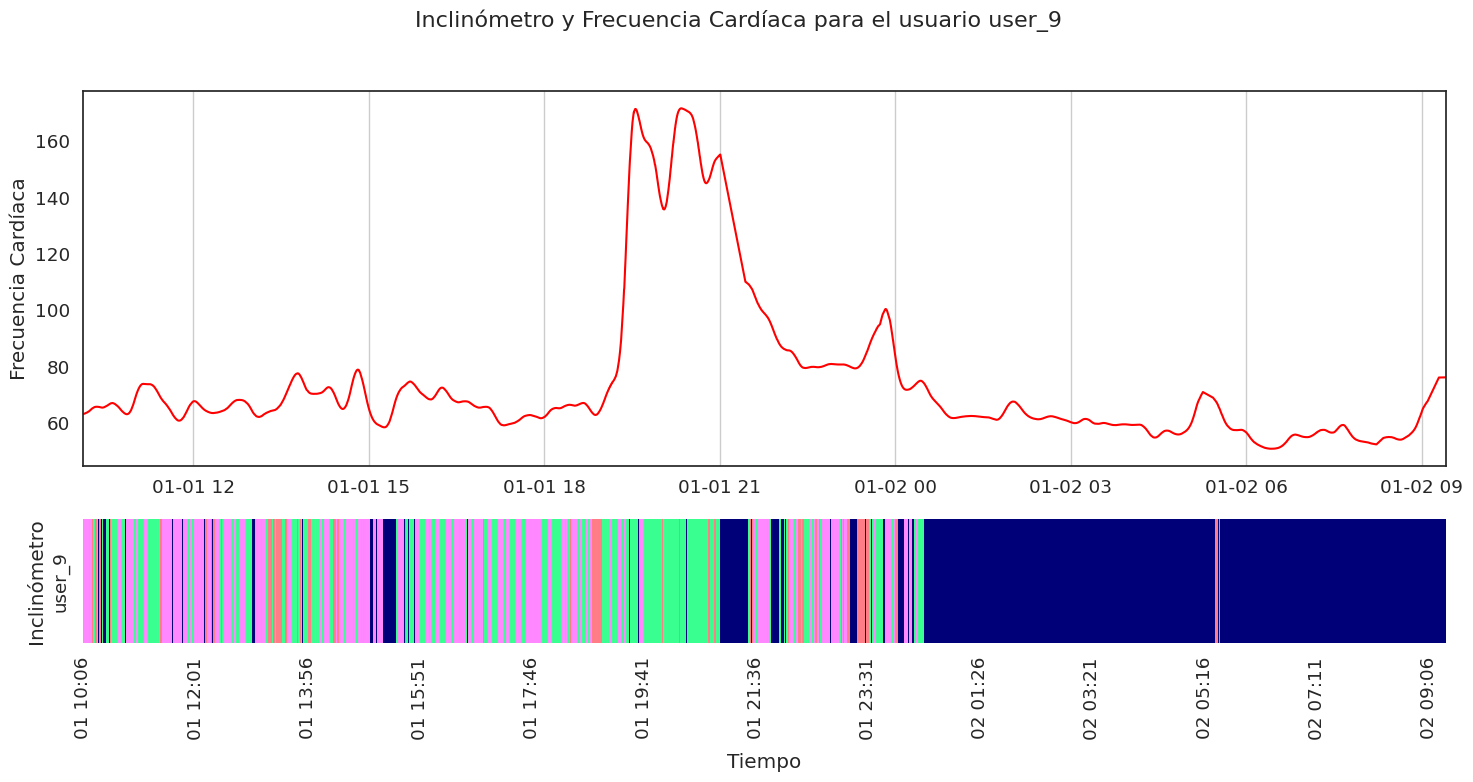

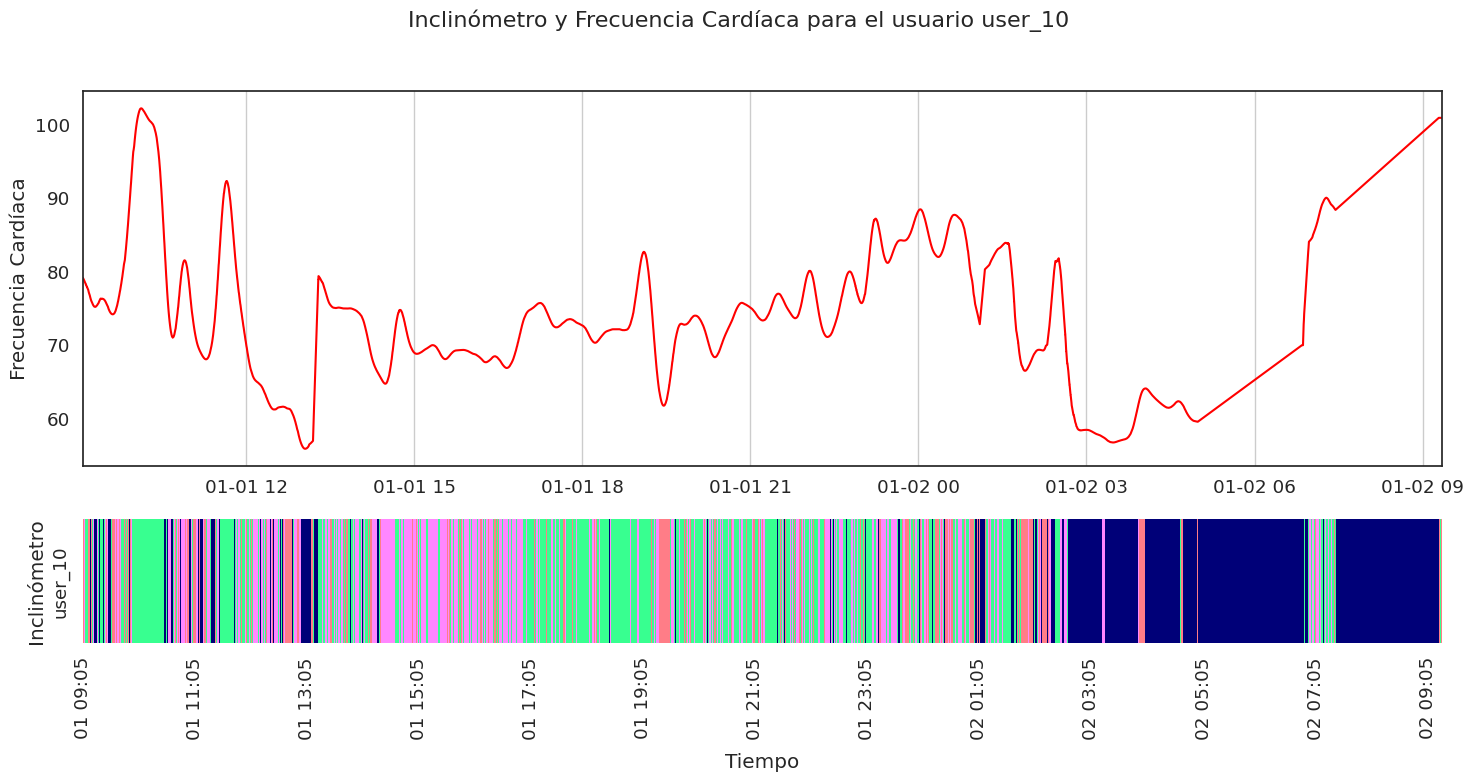

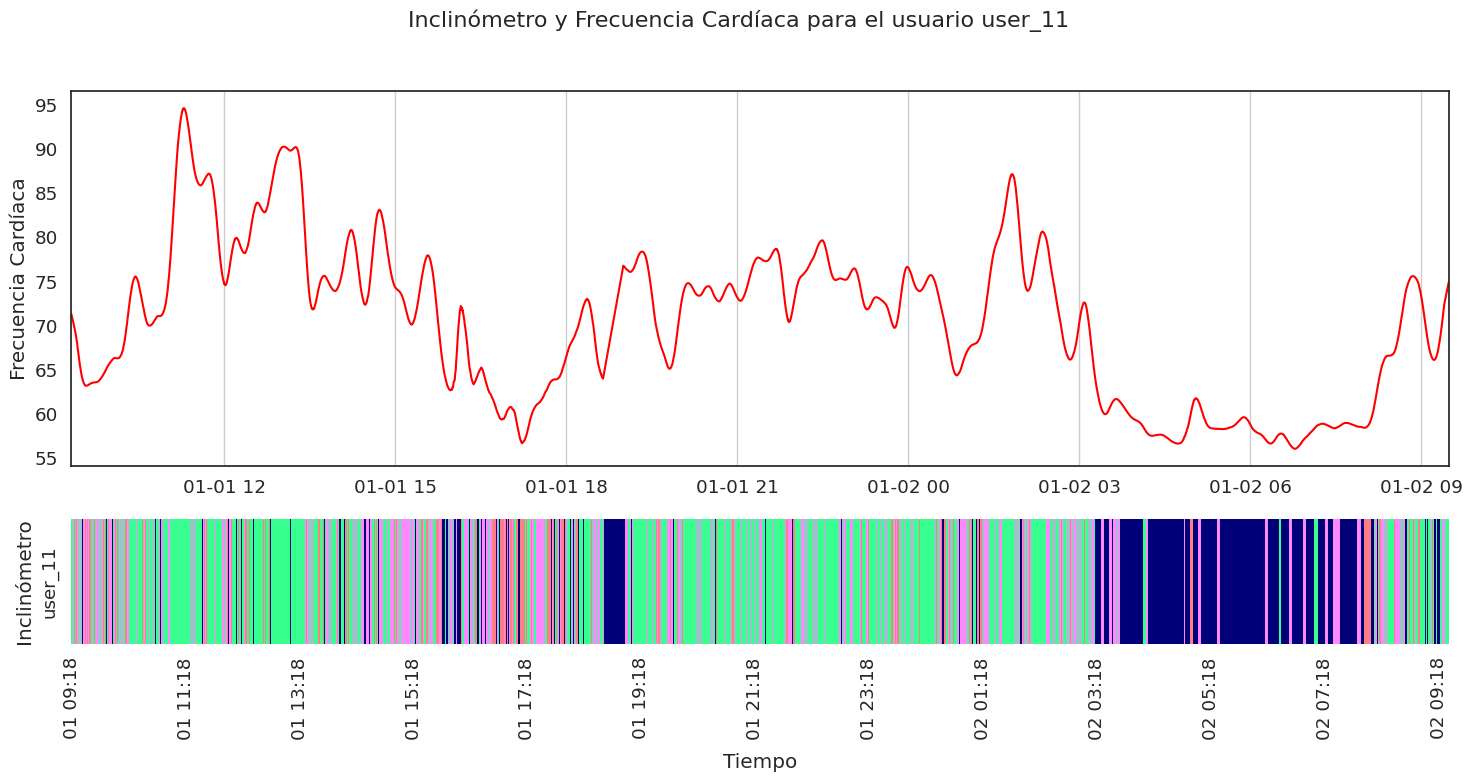

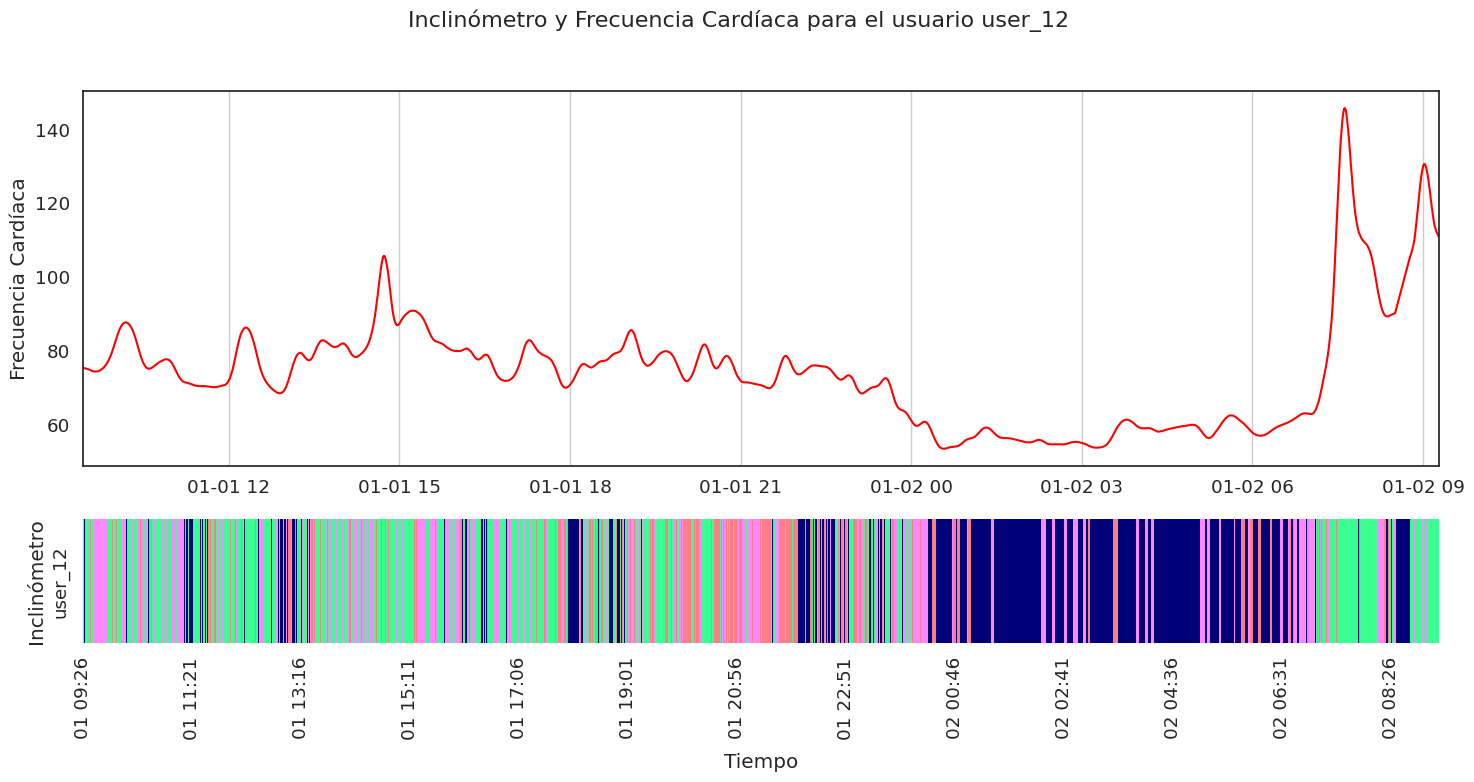

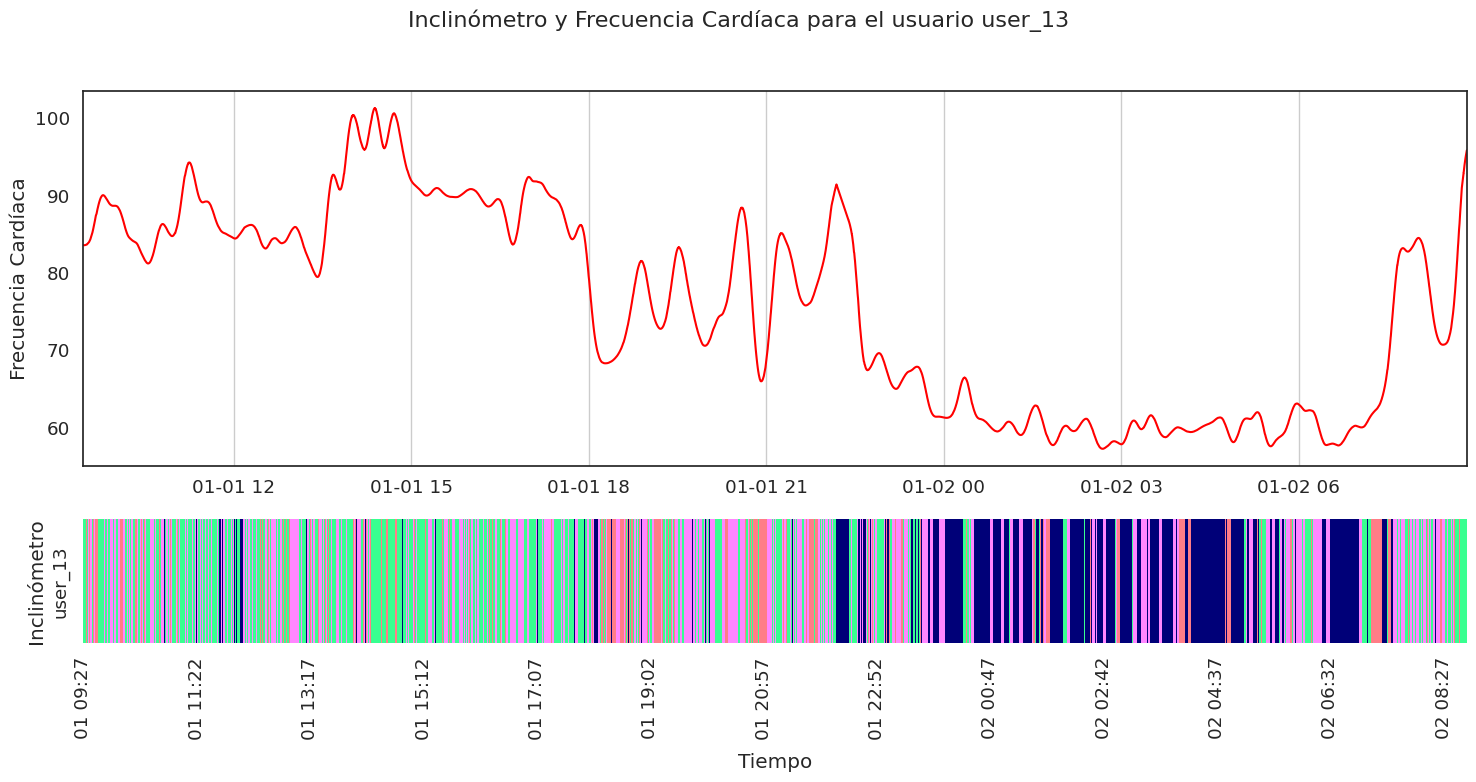

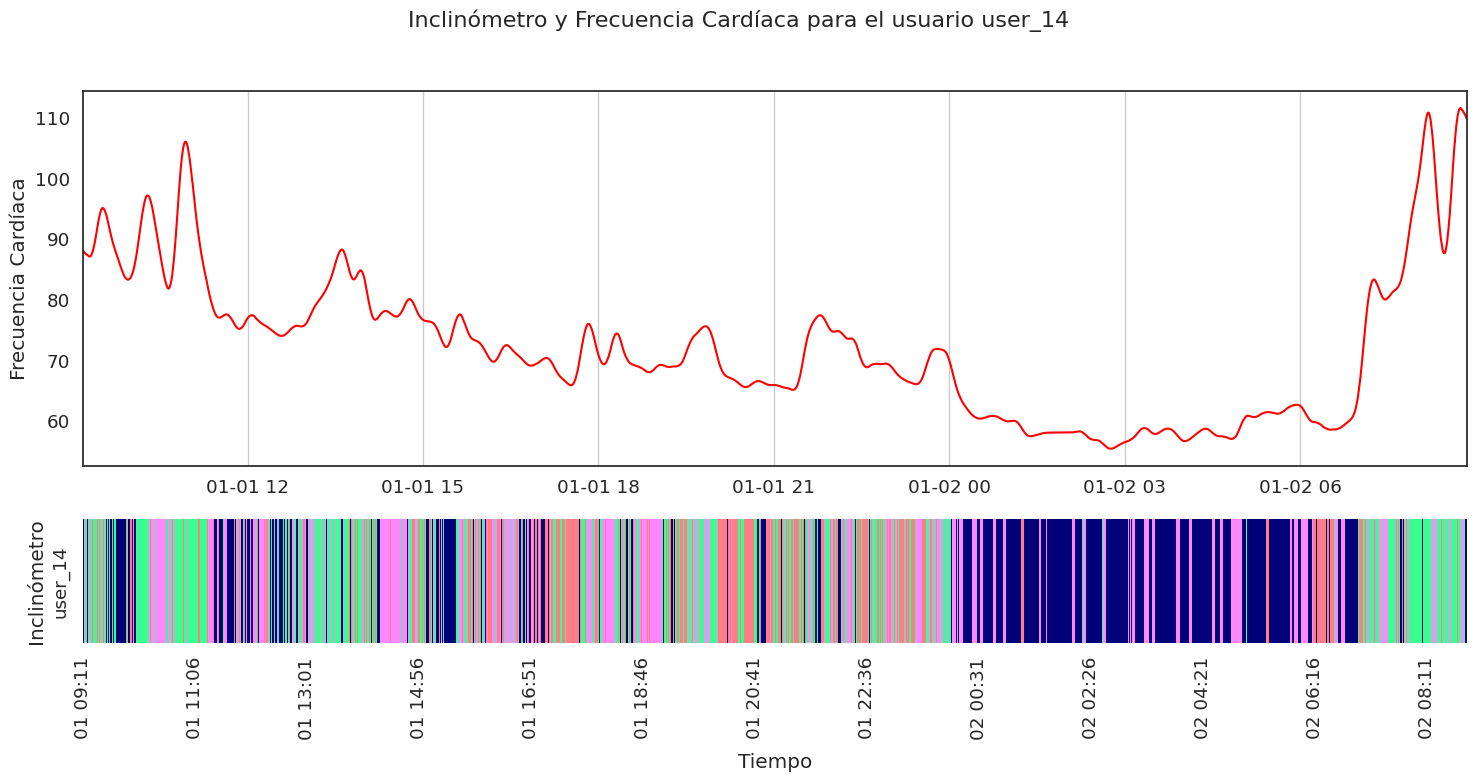

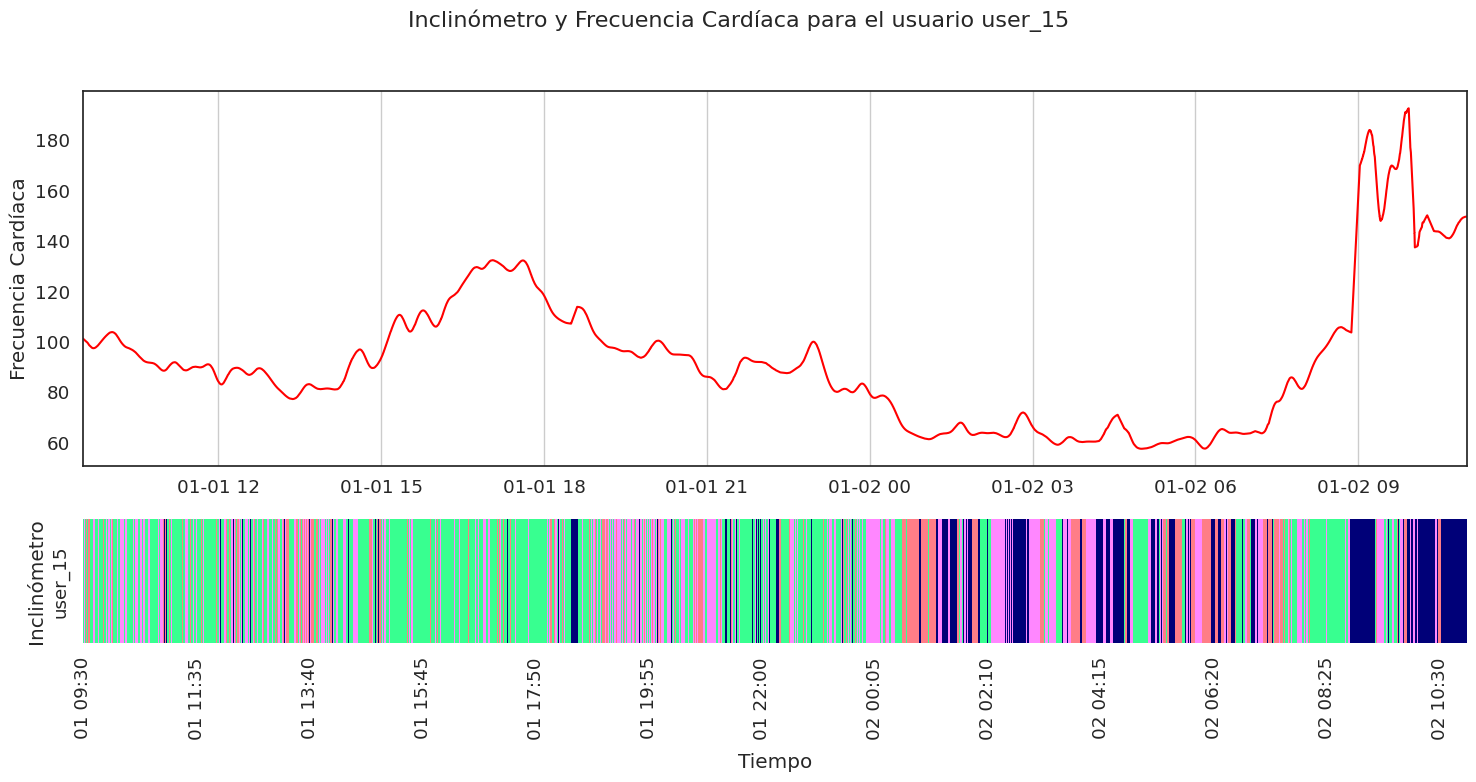

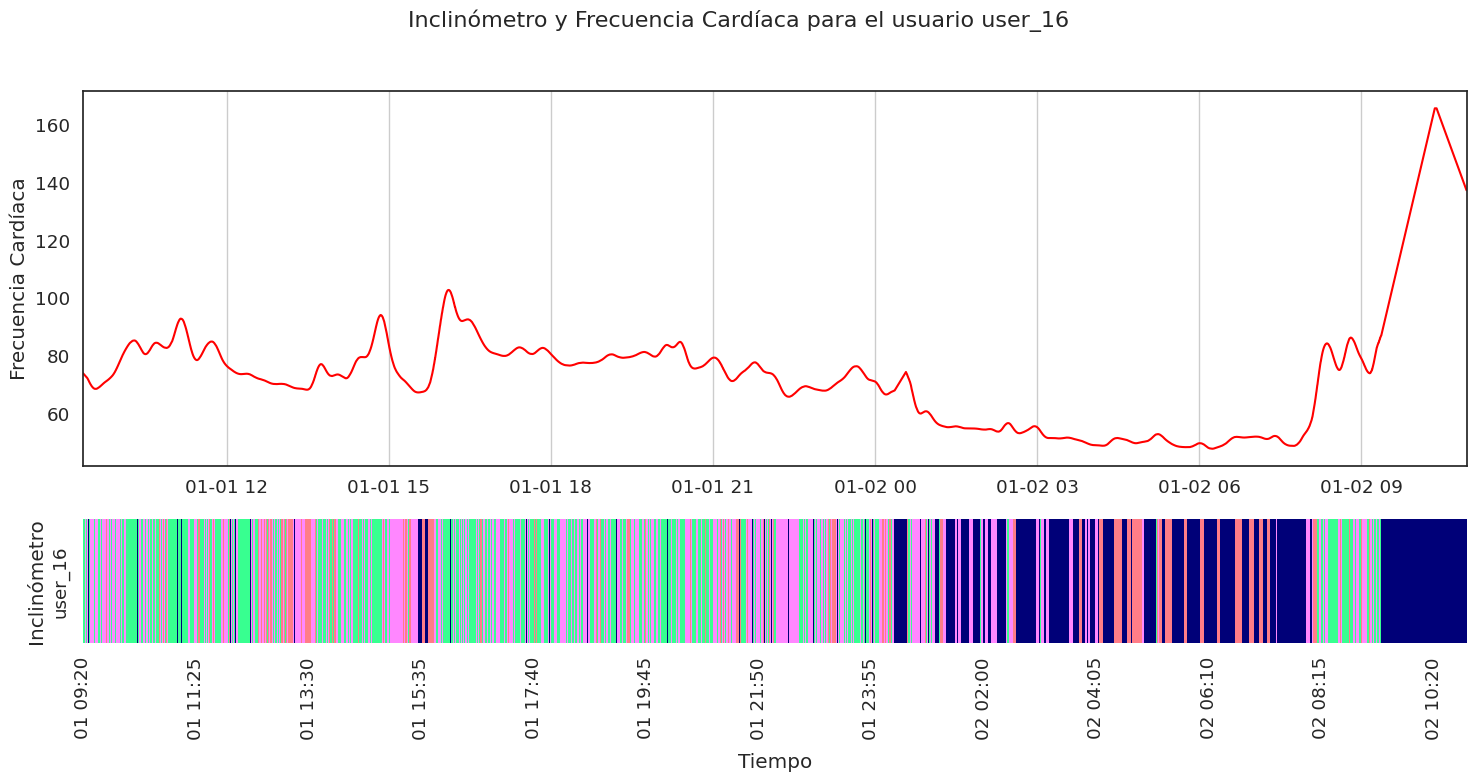

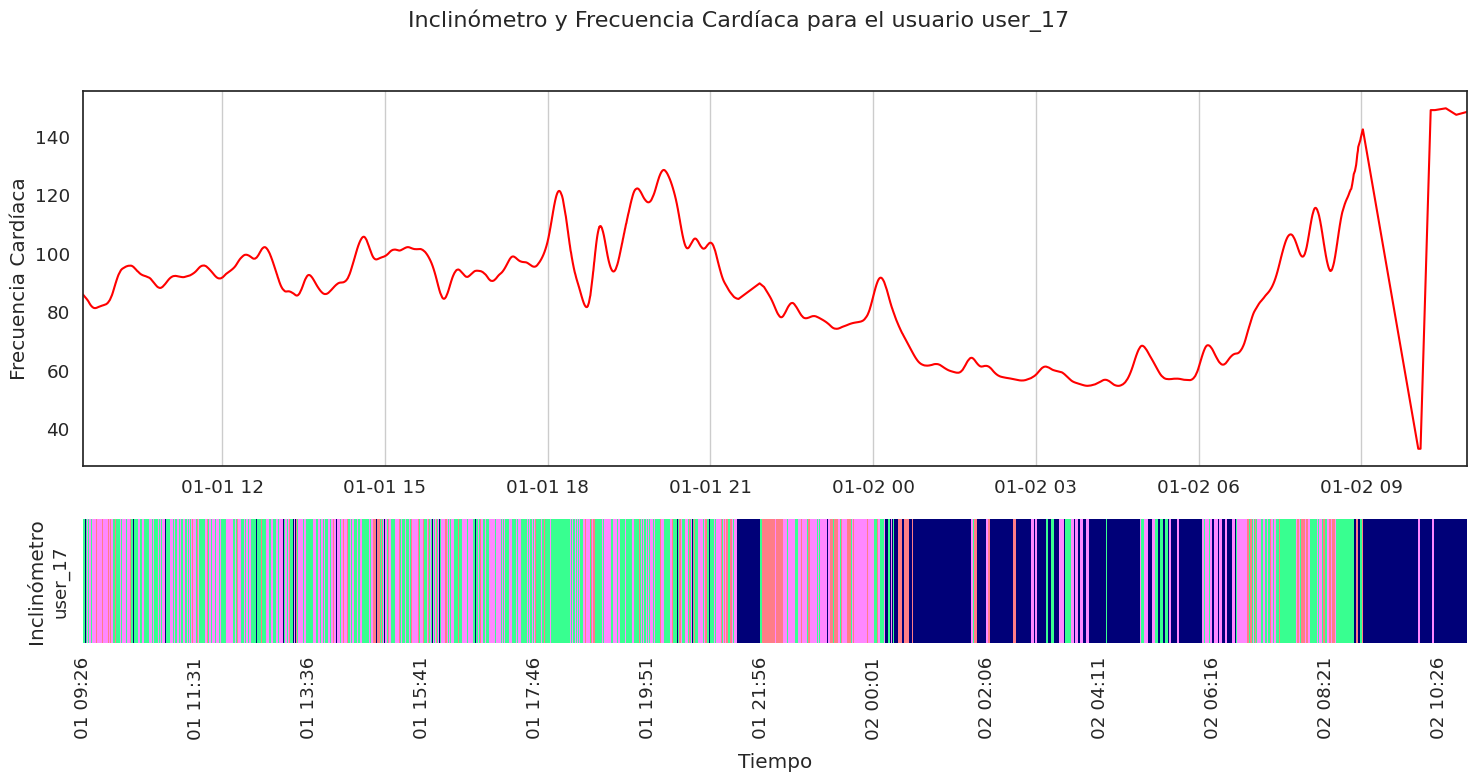

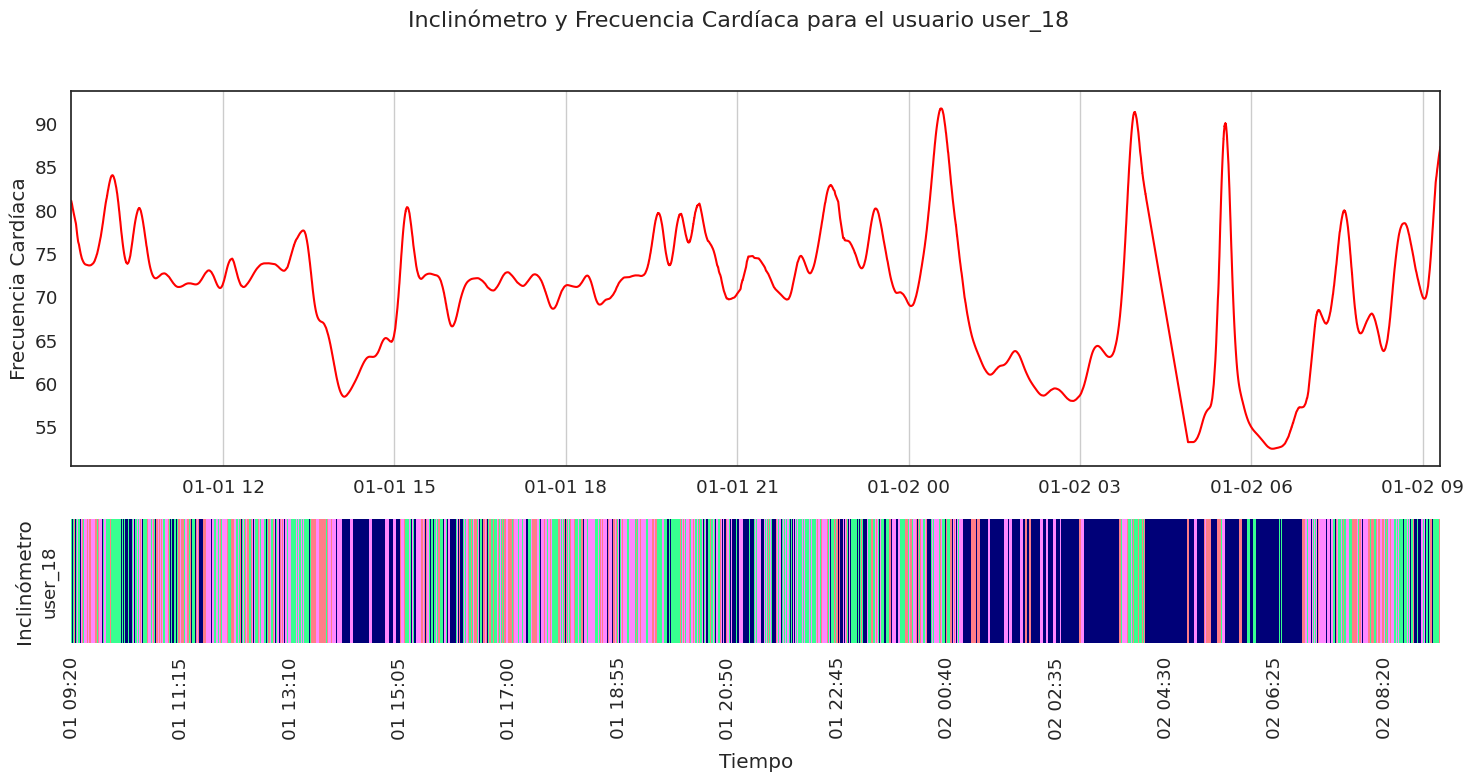

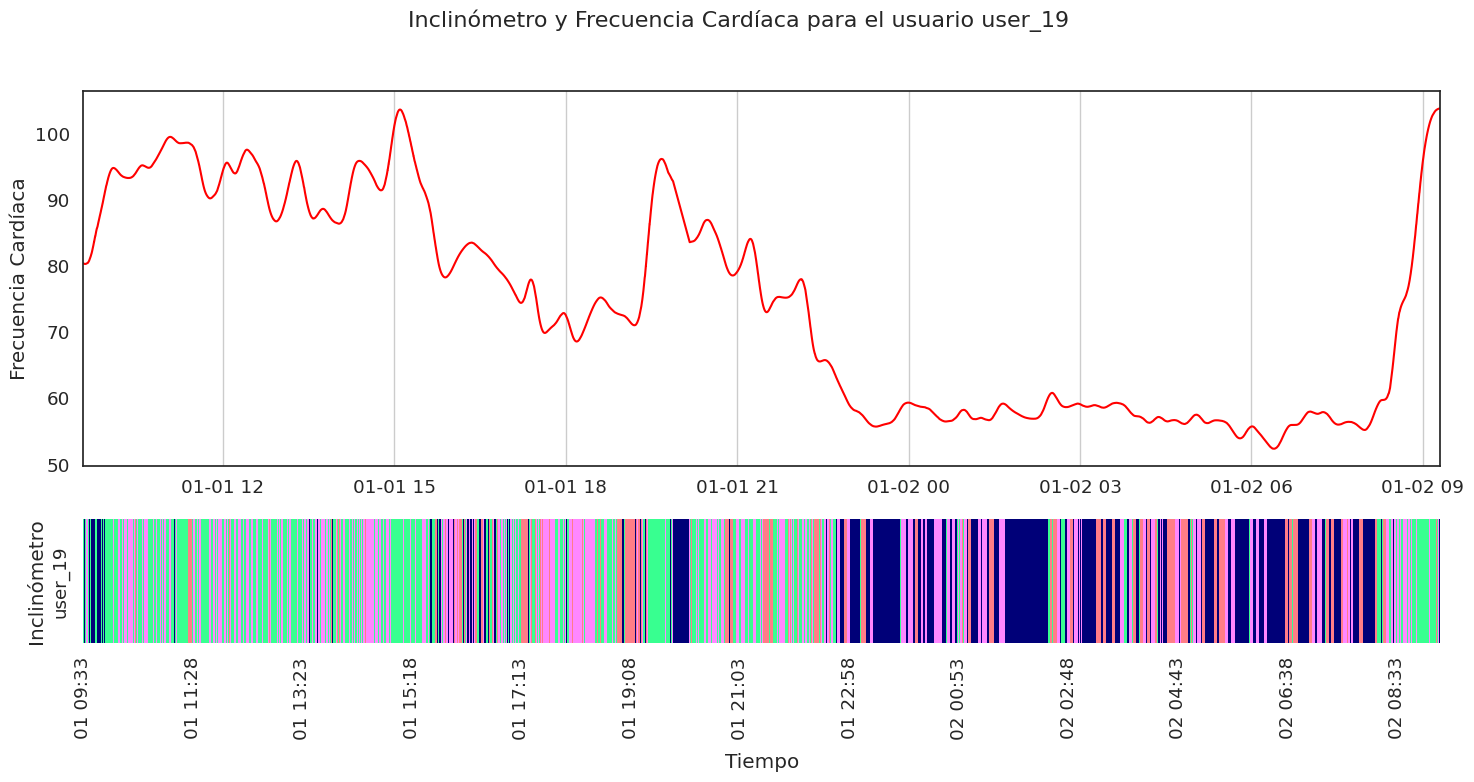

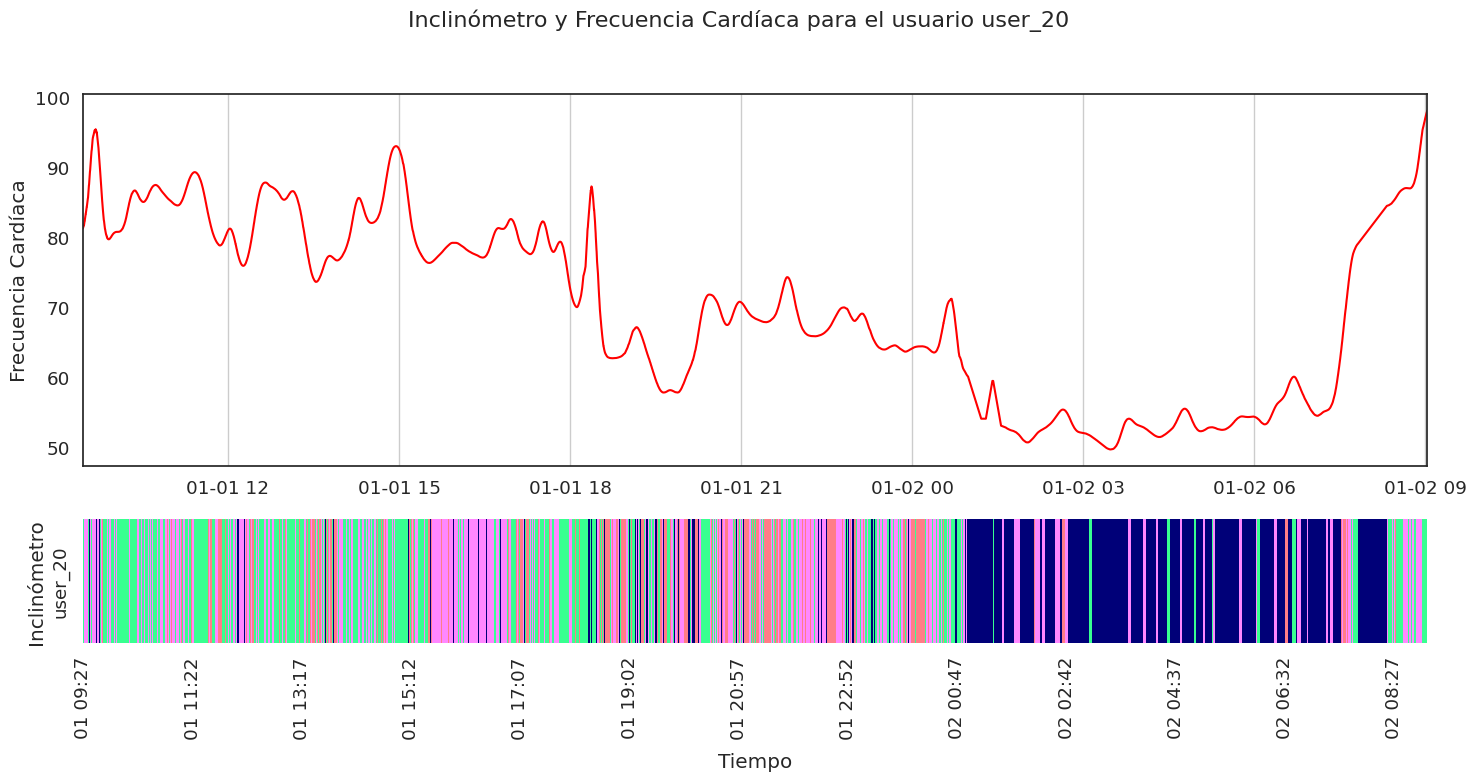

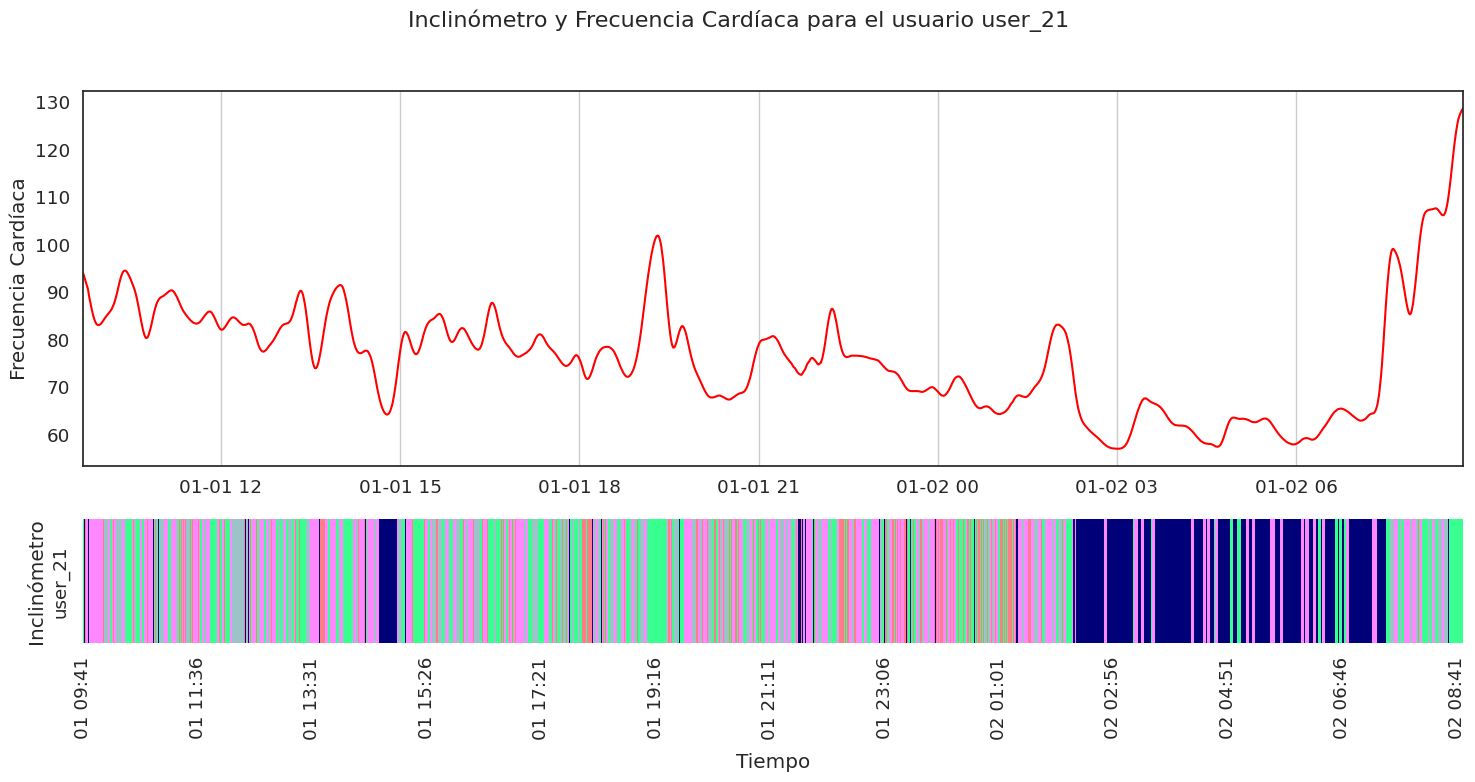

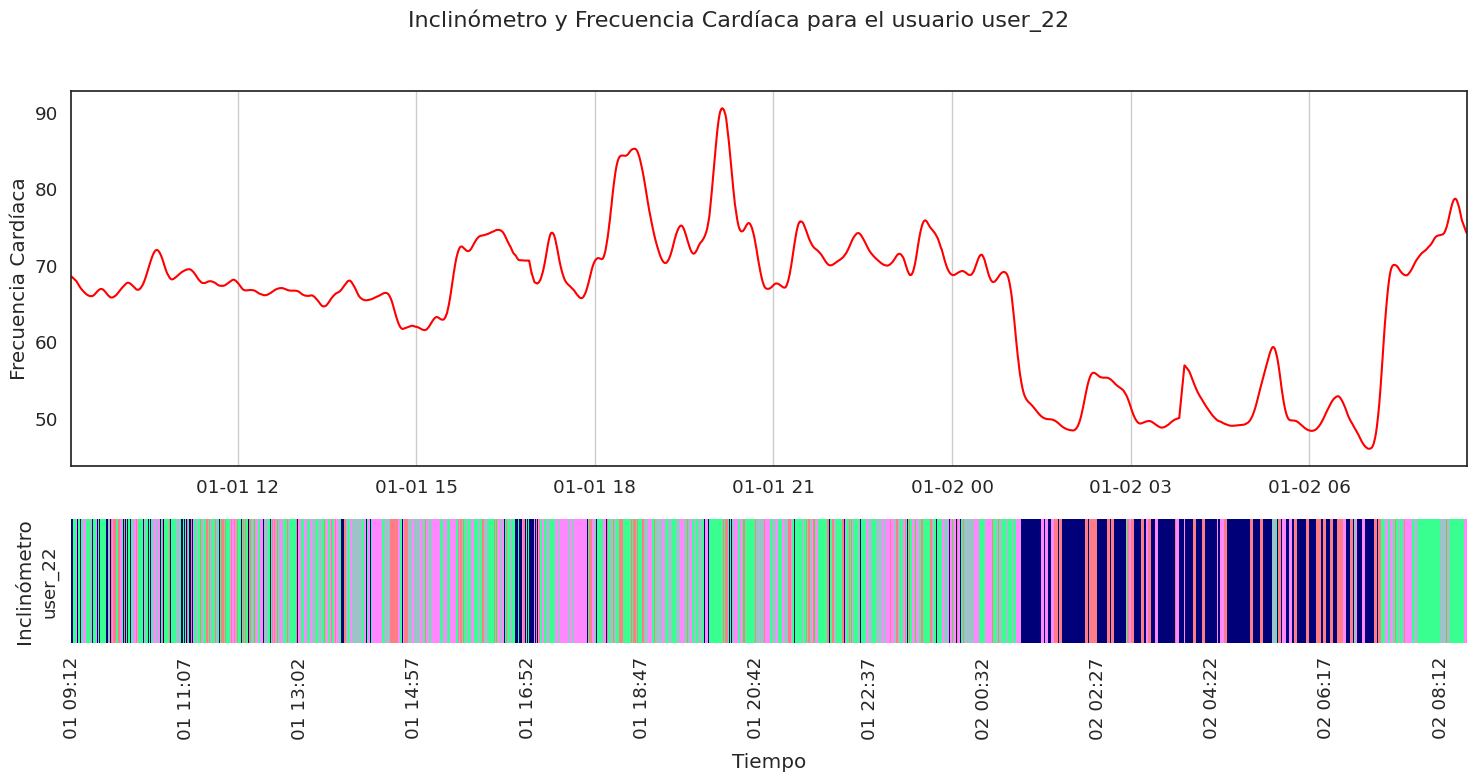

In [110]:
# Se ordenan los usuario (num desp _)
df_inclinometer['User_num'] = df_inclinometer['User'].str.replace(' ', '_')
df_inclinometer['User_num'] = df_inclinometer['User_num'].str.extract(r'(\d+)').astype(int)
df_inclinometer = df_inclinometer.sort_values('User_num').drop(columns='User_num')

# Crear una leyenda horizontal para el inclinómetro
fig_legend, ax_legend = plt.subplots(figsize=(20, 1))
colors = {0: '#000078', 1: '#38FF90', 2: '#FF87FF', 3: '#FF7D87'}
status_mapping = {'Apagado': 0, 'De pie': 1, 'Sentado': 2, 'Tumbado': 3}
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=status) for status, color in zip(status_mapping.keys(), colors.values())]
ax_legend.legend(handles=legend_patches, loc='center', ncol=4, frameon=False, title='Leyenda del Inclinómetro')	
ax_legend.axis('off')
plt.show()

# Se hace un plot para cada usuario
for user in df_inclinometer['User'].unique():
    df_user_inclinometer = df_inclinometer[df_inclinometer['User'] == user]
    df_user_actigraph = df_actigraph[df_actigraph['User'] == user]
    plot_user_inclinometer(df_user_inclinometer, df_user_actigraph, user)